In [7]:
library(linseed)

In [11]:
getwd()


[1] "/labshare/raph/eqtl/rosmap/expression"

In [10]:
setwd('../../../')
setwd('/labshare/raph/eqtl/rosmap/expression/')

In [12]:
rosmap <- LinseedObject$new("rosmap.dlpfc.tpms.gz", topGenes=10000)

File rosmap.dlpfc.tpms.gz exists
Reading dataset from file rosmap.dlpfc.tpms.gz
Make sure file is tab-separated and has row and column names
File successfully read


In [25]:
rosmap

<LinseedObject>
  Public:
    calculatePairwiseLinearity: function (negToZero = T) 
    calculateSignificanceLevel: function (iters = 1000, spearmanThreshold = 0, retVal = F) 
    calculateSpearmanCorrelation: function () 
    cellTypeNumber: 6
    clone: function (deep = FALSE) 
    deconvolutionError: function (dataset = "filtered", error = "norm") 
    deconvolve: function (dataset = "filtered", error = "norm", method = "dsa", 
    deconvolveByEndpoints: function (dataset = "filtered", error = "norm") 
    distances: 0.07374071694824 0.073958411112514 0.0739116885966106 0. ...
    endpoints: 0.000125378719079048 0.000184840116815172 0.000183607989 ...
    endpointsProjection: -0.00101617616327794 -0.0731707639253621 0.0074767798864 ...
    exp: list
    filterDataset: function (geneSubset) 
    filterDatasetByPval: function (pval = 0.001) 
    genes: list
    hysime: function (dataset = "filtered", error = "norm", set = FALSE) 
    initialize: function (...) 
    markers: list
    n

In [ ]:
# ppmi2 <- LinseedObject$new("ppmi.v121018.transcripts.csv.gz", samples=10:42, topGenes=10000)

Sampling weights [===========================] 100% eta:  0s
Total number of genes is 10000
The number of genes after filtering is 2617


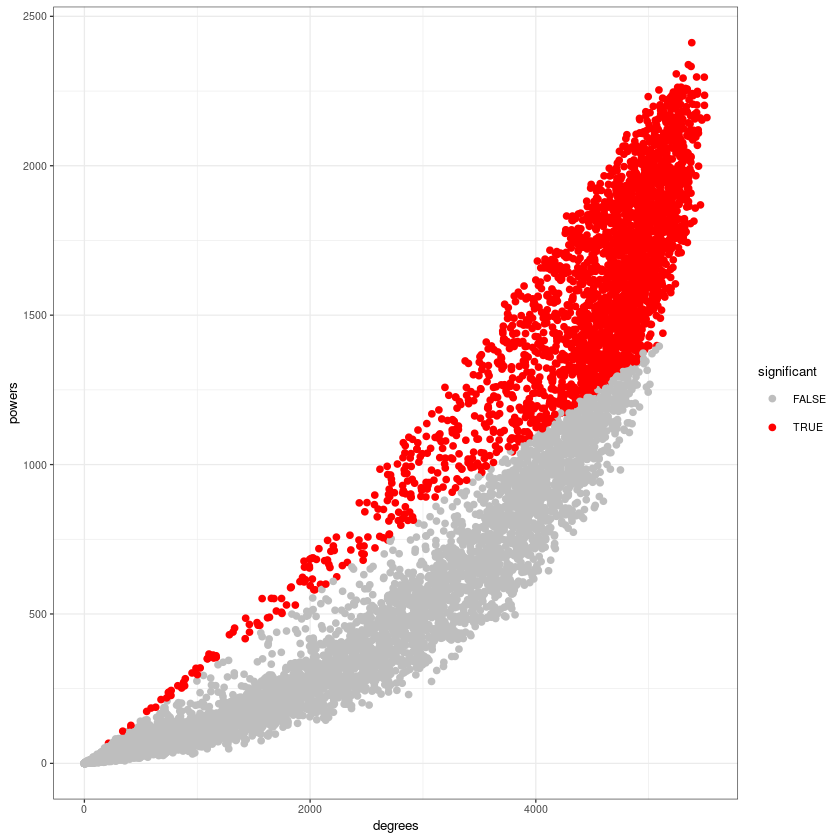

In [13]:
##colinearity networks
rosmap$calculatePairwiseLinearity()
rosmap$calculateSpearmanCorrelation()
rosmap$calculateSignificanceLevel(100)
rosmap$significancePlot(0.01)

rosmap$filterDatasetByPval(0.01)

Warning message:
“Removed 592 rows containing missing values (geom_point).”Warning message:
“Removed 592 rows containing missing values (geom_path).”

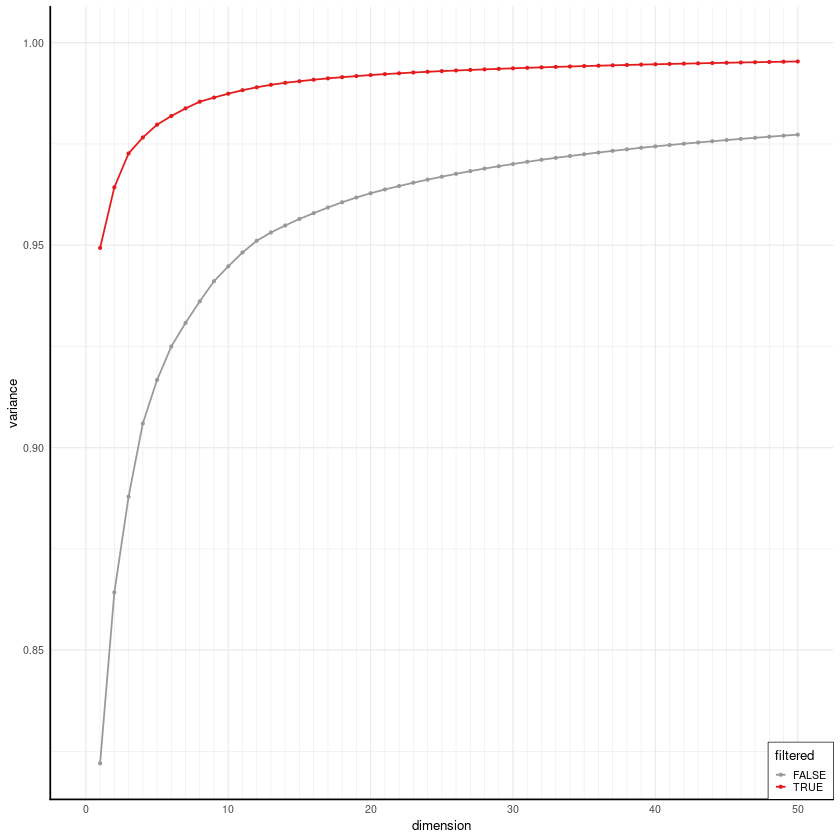

In [14]:
rosmap$svdPlot()
##determine numberof cell types by #of dimension elbow occurs at

In [32]:
##visualize after filtering, projection plot
rosmap$setCellTypeNumber(4)
# ppmi$project("full") # projecting full dataset
# ppmi$projectionPlot(color="filtered")

In [33]:
##deconvolution
rosmap$project("filtered")
rosmap$smartSearchCorners(dataset="filtered", error="norm")

Final vector is 


1 5 1 8

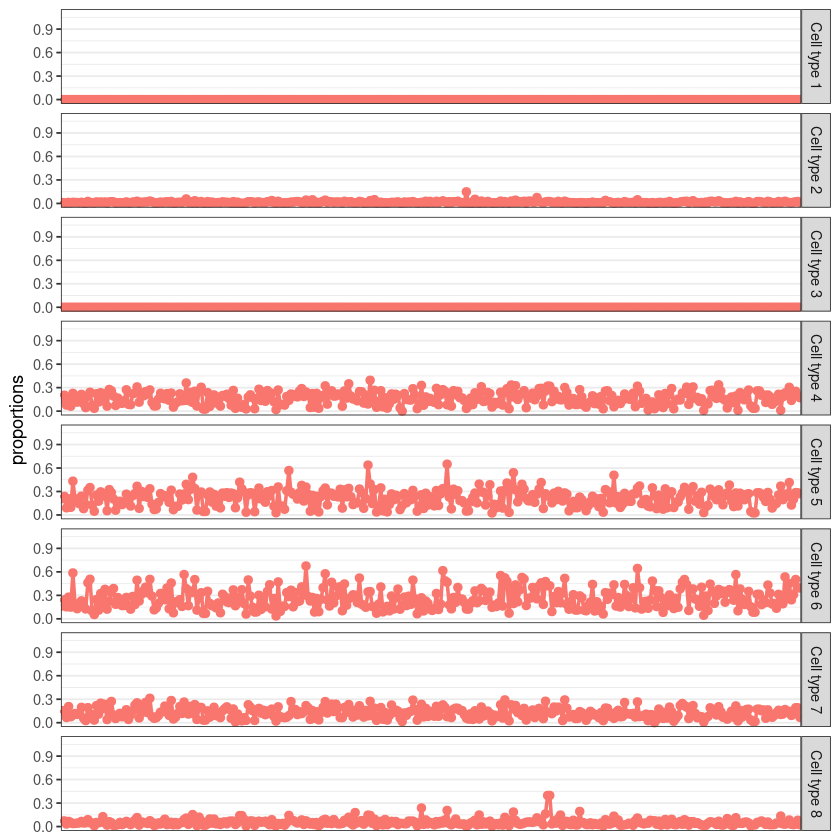

In [28]:

## 
rosmap$deconvolveByEndpoints()
plotProportions(rosmap$proportions)

In [34]:
tail(rosmap$proportions)

,SM.CTDSC,SM.CJGMZ,SM.CJIXK,SM.CJIZR,SM.CTEET,SM.CJJ1M,SM.CJIYJ,SM.CJIYA,SM.CTEER,SM.CJK3I,⋯,SM.CJGMU,SM.CJGM3,SM.CJGNQ,SM.CTDV1,SM.CJGMJ,SM.CJFPE,SM.CJEHM,SM.CJIZO,SM.CJEFQ,SM.CTDUP
Cell type 1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Cell type 2,0.6299118,0.6810186,0.4202645,0.8170565,0.4668289,0.5827691,0.6055639,0.5163119,0.5996608,0.7426167,⋯,0.2125371,0.5950805,0.7536362,0.6982297,0.6266010,0.5750867,0.7013926,0.7814501,0.7610815,0.5484796
Cell type 3,0.2177878,0.3164752,0.1815229,0.2782753,0.1884186,0.6807011,0.2624851,0.1916011,0.2197792,0.2596399,⋯,0.3716628,0.2550220,0.4952784,0.3231359,0.5469481,0.2650457,0.3493257,0.4707132,0.4114699,0.4723675
Cell type 4,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


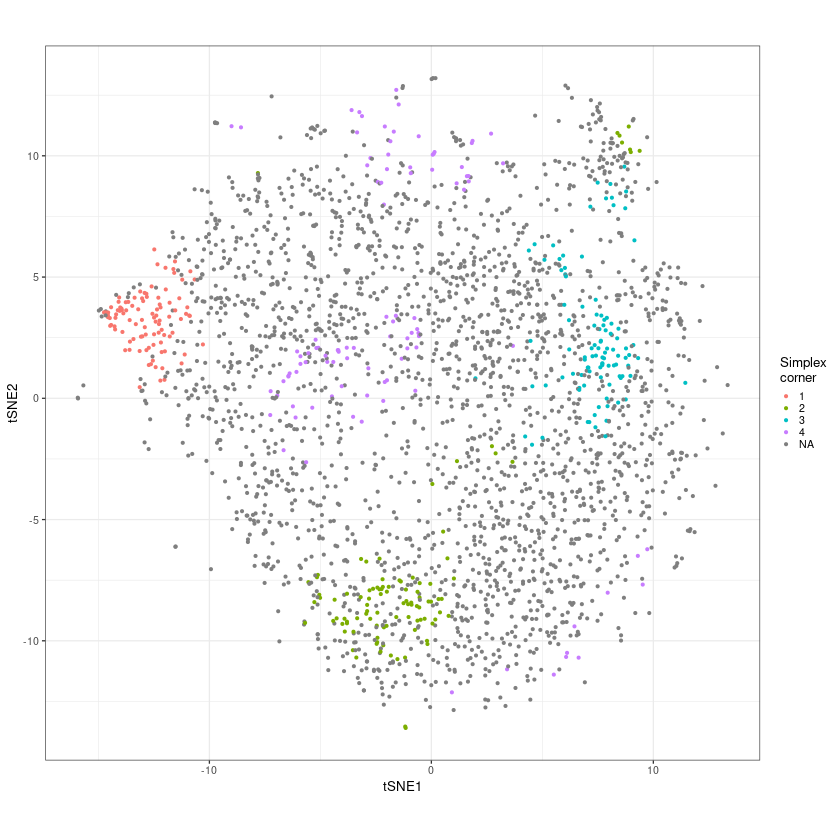

In [35]:
# lets select 100 genes closest to the simplex corners 
##tsne
rosmap$selectGenes(100)
rosmap$tsnePlot()

In [40]:
getwd()

[1] "/home/mooreank/linseed"

In [39]:
setwd('../../../../../')
setwd('home/mooreank/linseed')

In [41]:
genes <- data.frame(rosmap$selectGenes(100))
write.csv(genes, "rosmap_4cell_genes.csv")

In [42]:
head(genes)

X1,X2,X3,X4
<fct>,<fct>,<fct>,<fct>
ENST00000356264.6,ENST00000309594.4,ENST00000285518.10,ENST00000409476.5
ENST00000328257.12,ENST00000274137.9,ENST00000456936.3,ENST00000341541.7
ENST00000313683.14,ENST00000344417.9,ENST00000341285.7,ENST00000370542.1
ENST00000239940.11,ENST00000441788.6,ENST00000283131.3,ENST00000513238.5
ENST00000566012.1,ENST00000395176.2,ENST00000264710.4,ENST00000347063.8
ENST00000447467.6,ENST00000358022.4,ENST00000299957.10,ENST00000355849.9


In [43]:
genes['X1']

X1
<fct>
ENST00000356264.6
ENST00000328257.12
ENST00000313683.14
ENST00000239940.11
ENST00000566012.1
ENST00000447467.6
ENST00000562924.5
ENST00000373243.6
ENST00000435891.5


In [43]:
100genes <- read.csv('ppmi_6cell_genes.csv')


genes1 <- as.vector(genes['X1'])
#genes1_list <- genes1
genes2 <- as.vector(genes['X2'])
#genes2_list <- genes2
genes3 <- as.vector(genes['X3'])
#genes3_list <- genes3
genes4 <- as.vector(genes['X4'])
#genes4_list <- genes4
genes5 <- as.vector(genes['X5'])
#genes5_list <- genes5
genes6 <- as.vector(genes['X6'])
#genes6_list <- genes6

# genes1['gene_name'] = ''
# genes2['gene_name'] = ''
# genes3['gene_name'] = ''
# genes4['gene_name'] = ''
# genes5['gene_name'] = ''
# genes6['gene_name'] = ''

